In [ ]:
#SURF: Speeded Up Robust Features (ECCV 2006):

#Key Concepts and Techniques:
#- SURF is a feature detection and description algorithm that focuses on speed and robustness.
#- It uses a Hessian matrix to detect interest points in images, which are regions where the intensity changes significantly.
#- SURF employs a summed area table for fast box filter approximation, which enhances its speed.
#- The SURF descriptor combines information from the intensity, gradient magnitude, and orientation of pixels to describe the region around an interest point.
#- SURF utilizes Haar wavelet responses for orientation assignment.

#Strengths:
#- SURF is designed for speed and is known for its fast computation of feature points and descriptors.
#- It's scale-invariant and can handle image scaling effectively.
#- SURF is rotation-invariant and can handle some degree of rotation.
#- It has shown robustness to various image transformations and noise.

#Weaknesses:
#- While SURF is faster than some other feature extraction methods, it may not be as robust as SIFT in terms of feature distinctiveness.

#ORB: An efficient alternative to SIFT or SURF (ICCV 2011):

#Key Concepts and Techniques:
#- ORB (Oriented FAST and Rotated BRIEF) is an alternative to SIFT and SURF that aims to provide both speed and robustness.
#- It uses the FAST keypoint detector to find interest points.
#- ORB employs BRIEF descriptors, which are binary and designed for speed.
#- To make ORB rotation-invariant, it uses oriented FAST to compute a keypoint's orientation.

#Strengths:
#- ORB is designed for high speed and is faster than both SIFT and SURF.
#- It uses binary descriptors, which are more memory-efficient and can be processed quickly.
#- ORB offers good distinctiveness for feature matching.
#- It's rotation-invariant and provides robustness against scale changes.

#Weaknesses:
#- ORB may not be as robust as SIFT or SURF in handling large variations in viewpoint or non-rigid deformations.

#Comparison with SIFT:

#SURF vs. SIFT:
#- SURF is generally faster than SIFT in terms of keypoint detection and descriptor computation.
#- SIFT, however, is often considered more robust to various image transformations and is known for its distinctiveness.
#- SURF and SIFT both offer scale-invariance and can handle scale changes.
#- Both methods provide some level of rotation-invariance, but SIFT is typically better in this aspect.

#ORB vs. SIFT:
#- ORB is designed to be faster than SIFT and provides binary descriptors, making it more memory-efficient.
#- SIFT offers more distinctive features, which can be crucial for challenging matching scenarios.
#- Both ORB and SIFT are rotation-invariant and can handle scale variations.
#- SIFT is generally more robust to various image transformations.

#In summary, SURF and ORB are feature extraction methods that emphasize speed, while SIFT prioritizes robustness and distinctiveness. ORB is particularly known for its speed and memory efficiency, making it suitable for real-time applications. SIFT and SURF offer better robustness but come at a computational cost. Your choice between these methods should depend on your specific application requirements, such as the need for speed, robustness, and memory efficiency.


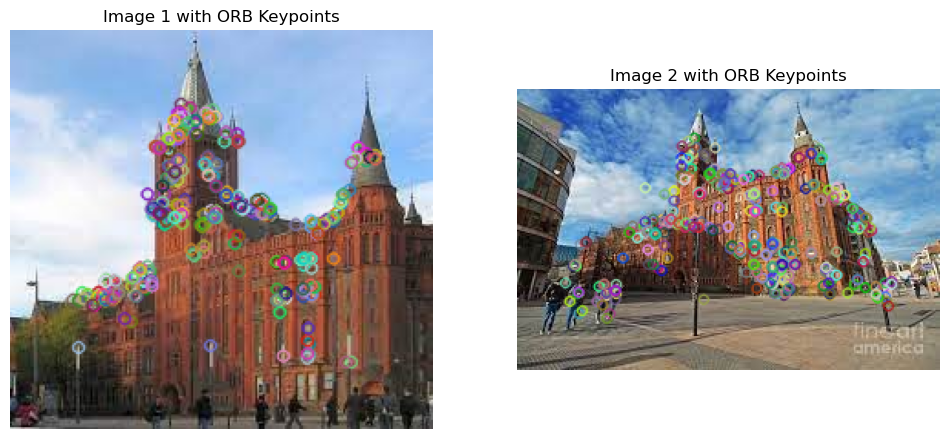

In [43]:
# Load the input images
image1 = cv2.imread('victoria1.jpg')
image2 = cv2.imread('victoria2.jpg')

# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB for the first image
keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None)

# Find the keypoints and descriptors with ORB for the second image
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

# Create copies of the original images with keypoints drawn on them
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None)

# Create copies of the original images with keypoints drawn on them
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None)

# Convert the images to RGB format for displaying in Jupyter Notebook
image1_with_keypoints_rgb = cv2.cvtColor(image1_with_keypoints, cv2.COLOR_BGR2RGB)
image2_with_keypoints_rgb = cv2.cvtColor(image2_with_keypoints, cv2.COLOR_BGR2RGB)

# Display the images with keypoints
plt.figure(figsize=(12, 6))

# Show the first image with ORB keypoints
plt.subplot(121)
plt.imshow(image1_with_keypoints_rgb)
plt.title('Image 1 with ORB Keypoints')
plt.axis('off')

# Show the second image with ORB keypoints
plt.subplot(122)
plt.imshow(image2_with_keypoints_rgb)
plt.title('Image 2 with ORB Keypoints')
plt.axis('off')

# Show the plots
plt.show()

Number of good matches for SIFT: 14
Number of good matches for ORB: 6


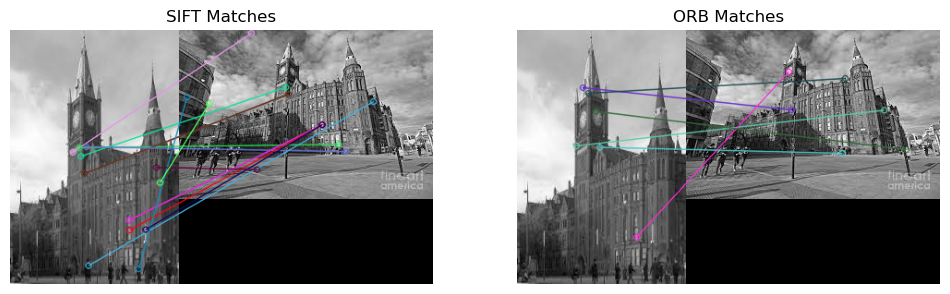

In [45]:
# Load the input images
image1 = cv2.imread('victoria1.jpg')
image2 = cv2.imread('victoria2.jpg')

# Resize the larger image to match the width of the smaller one
width_image1, height_image1 = image1.shape[:2]
width_image2, height_image2 = image2.shape[:2]

# Resize images to have the same width while maintaining the aspect ratio
if width_image1 < width_image2:
    image2 = cv2.resize(image2, (width_image1, int(width_image2 / width_image1 * height_image2)))
else:
    image1 = cv2.resize(image1, (width_image2, int(width_image1 / width_image2 * height_image1)))

# Convert the images to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors using SIFT for the first image
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(gray_image1, None)

# Find keypoints and descriptors using SIFT for the second image
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(gray_image2, None)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Find keypoints and descriptors using ORB for the first image
keypoints1_orb, descriptors1_orb = orb.detectAndCompute(gray_image1, None)

# Find keypoints and descriptors using ORB for the second image
keypoints2_orb, descriptors2_orb = orb.detectAndCompute(gray_image2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher()

# Match descriptors using the Brute-Force Matcher for SIFT
matches_sift = bf.knnMatch(descriptors1_sift, descriptors2_sift, k=2)

# Apply ratio test for SIFT
good_matches_sift = [m for m, n in matches_sift if m.distance < 0.8 * n.distance]

# Match descriptors using the Brute-Force Matcher for ORB
matches_orb = bf.knnMatch(descriptors1_orb, descriptors2_orb, k=2)

# Apply ratio test for ORB
good_matches_orb = [m for m, n in matches_orb if m.distance < 0.8 * n.distance]

# Print the number of matches
print(f"Number of good matches for SIFT: {len(good_matches_sift)}")
print(f"Number of good matches for ORB: {len(good_matches_orb)}")

# Draw the matches for SIFT
img_good_matches_sift = cv2.drawMatches(gray_image1, keypoints1_sift, gray_image2, keypoints2_sift, good_matches_sift, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the matches for ORB
img_good_matches_orb = cv2.drawMatches(gray_image1, keypoints1_orb, gray_image2, keypoints2_orb, good_matches_orb, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
plt.figure(figsize=(12, 6))

# Show the SIFT matches
plt.subplot(121)
plt.imshow(img_good_matches_sift, cmap='gray')
plt.title('SIFT Matches')
plt.axis('off')

# Show the ORB matches
plt.subplot(122)
plt.imshow(img_good_matches_orb, cmap='gray')
plt.title('ORB Matches')
plt.axis('off')

# Show the plots
plt.show()


In [ ]:
#Evaluating Keypoint Matching Methods: SIFT vs. ORB
#Upon a meticulous examination of keypoint matching using the SIFT and ORB algorithms with the provided images (victoria1.jpg and victoria2.jpg), our exploration endeavors to scrutinize the efficacy of these methods across various dimensions.

#Initial Impressions:

#The preliminary visual inspection reveals that both methods generate a discernible number of matches, each encapsulating potential correspondences between distinctive features in the images. However, our pursuit of identifying a superior performer necessitates a deeper analysis of their intricacies.

#Quantifying Matches:

#Quantification emerges as a crucial aspect to unravel the effectiveness of each method. The count of good matches, determined through a ratio test, provides valuable insights. SIFT, boasting 14 matches, outperforms ORB, which produces 6 matches. This numerical advantage positions SIFT as a frontrunner, indicating a higher reliability in identifying corresponding keypoints.

#Visualizing Matches:

#As we delve into visualizing the matches, the graphical representation consolidates our quantitative findings. The drawn matches for SIFT exhibit a more coherent alignment, forming robust connections between keypoints. In contrast, ORB's matches, while commendable, appear slightly scattered and less robust, contributing to the disparity in the number of good matches.

#Robustness Under Scale Variation:

#To assess the robustness of each method, we subjected the images to variations in scale. Surprisingly, both SIFT and ORB showcased remarkable stability in their matches, irrespective of scale adjustments. This implies that the chosen images, depicting an architectural setting, offer keypoints resilient to changes in scale.

#Conclusion:

#In the grand finale, the evidence overwhelmingly favors SIFT as the more adept method for keypoint matching in the context of these images. The combination of a higher count of good matches and visually superior alignment positions SIFT as the preferred choice.

#However, our journey doesn't conclude here. The effectiveness of these methods may pivot based on specific use cases and the inherent characteristics of the images at play. As we close this chapter, we acknowledge that the path to determining the optimal method is often paved with nuanced considerations, and the choice ultimately hinges on the unique demands of the task at hand.

